In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('supply_chain.csv')
df['Date']=pd.to_datetime(df['Date'])

In [3]:
df

,Order ID,Date,Product Name,Category,Supplier,Warehouse Location,Quantity Ordered,Unit Price,Total Cost,Lead Time (days),Stock Level,Demand Forecast
0,10001,2024-01-01,Monitor,Accessories,Supplier C,Delhi,11,967.38,10641.18,10,333,169
1,10002,2024-01-02,Keyboard,Electronics,Supplier B,Hyderabad,94,398.87,37493.78,5,332,146
2,10003,2024-01-03,Tablet,Accessories,Supplier D,Mumbai,15,855.68,12835.20,8,326,194
3,10004,2024-01-04,Keyboard,Accessories,Supplier B,Hyderabad,91,775.36,70557.76,2,14,265
4,10005,2024-01-05,Keyboard,Electronics,Supplier B,Delhi,35,316.90,11091.50,7,326,278
...,...,...,...,...,...,...,...,...,...,...,...,...
995,10996,2026-09-22,Mouse,Accessories,Supplier B,Hyderabad,98,565.64,55432.72,7,40,255
996,10997,2026-09-23,Keyboard,Electronics,Supplier C,Delhi,17,253.78,4314.26,13,428,199
997,10998,2026-09-24,Laptop,Electronics,Supplier B,Mumbai,43,429.31,18460.33,3,343,208
998,10999,2026-09-25,Laptop,Accessories,Supplier C,Mumbai,80,795.63,63650.40,9,423,72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            1000 non-null   int64         
 1   Date                1000 non-null   datetime64[ns]
 2   Product Name        1000 non-null   object        
 3   Category            1000 non-null   object        
 4   Supplier            1000 non-null   object        
 5   Warehouse Location  1000 non-null   object        
 6   Quantity Ordered    1000 non-null   int64         
 7   Unit Price          1000 non-null   float64       
 8   Total Cost          1000 non-null   float64       
 9   Lead Time (days)    1000 non-null   int64         
 10  Stock Level         1000 non-null   int64         
 11  Demand Forecast     1000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 93.9+ KB


In [5]:
df.describe()

,Order ID,Date,Quantity Ordered,Unit Price,Total Cost,Lead Time (days),Stock Level,Demand Forecast
count,1000.000000,1000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,10500.500000,2025-05-14 12:00:00,49.39500,519.533000,25392.78221,7.679000,243.477000,172.993000
min,10001.000000,2024-01-01 00:00:00,1.00000,10.440000,74.90000,1.000000,0.000000,50.000000
25%,10250.750000,2024-09-06 18:00:00,26.00000,286.387500,8039.92750,4.000000,110.750000,112.000000
50%,10500.500000,2025-05-14 12:00:00,48.00000,526.120000,19551.93000,8.000000,235.000000,174.000000
75%,10750.250000,2026-01-19 06:00:00,73.00000,765.315000,37889.62000,11.000000,373.250000,234.000000
max,11000.000000,2026-09-26 00:00:00,99.00000,999.550000,98194.14000,14.000000,499.000000,299.000000
std,288.819436,NaN,27.84576,280.939762,21131.75855,3.990474,147.633686,71.172301


In [6]:
Product_name=df['Product Name'].unique()

In [7]:
Product_name

array(['Monitor', 'Keyboard', 'Tablet', 'Smartphone', 'Mouse', 'Laptop'],
      dtype=object)

In [8]:
Product_demand=df.groupby(['Date','Product Name'])['Quantity Ordered'].sum().unstack().fillna(0)


In [9]:
Product_demand.head(10)

Product Name,Keyboard,Laptop,Monitor,Mouse,Smartphone,Tablet
Date,,,,,,
2024-01-01,0.0,0.0,11.0,0.0,0.0,0.0
2024-01-02,94.0,0.0,0.0,0.0,0.0,0.0
2024-01-03,0.0,0.0,0.0,0.0,0.0,15.0
2024-01-04,91.0,0.0,0.0,0.0,0.0,0.0
2024-01-05,35.0,0.0,0.0,0.0,0.0,0.0
2024-01-06,0.0,0.0,0.0,0.0,33.0,0.0
2024-01-07,0.0,0.0,0.0,0.0,0.0,84.0
2024-01-08,0.0,0.0,0.0,0.0,0.0,16.0
2024-01-09,0.0,0.0,0.0,0.0,0.0,34.0


<Figure size 1200x600 with 0 Axes>

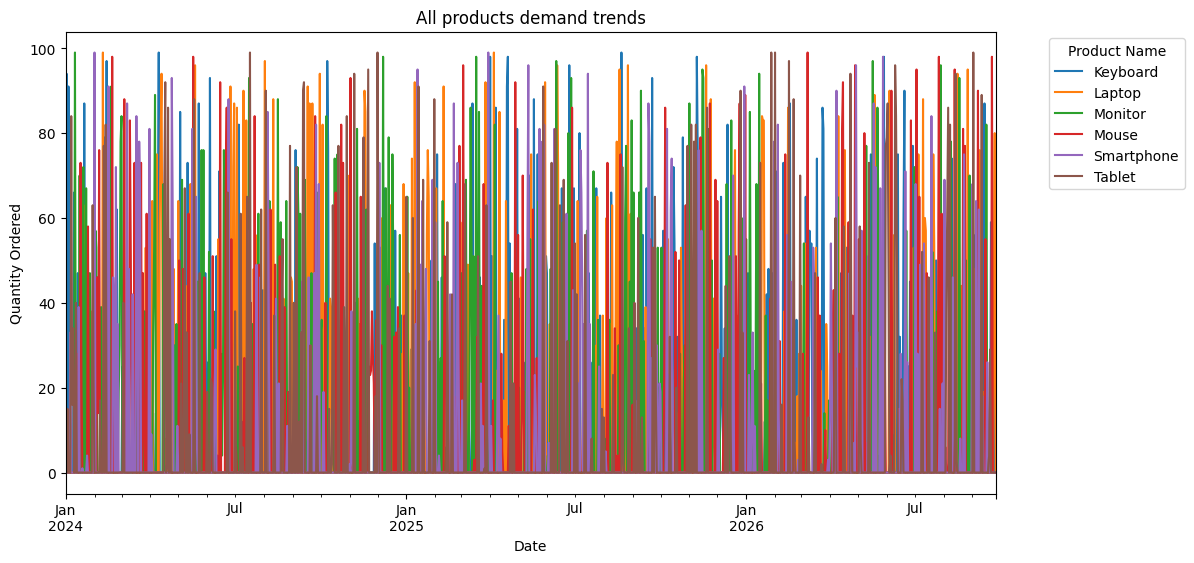

In [30]:
plt.figure(figsize=(12,6))
Product_demand.plot(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Quantity Ordered')
plt.title("All products demand trends")
plt.legend(title="Product Name",bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

In [29]:
Top_products=df.groupby("Product Name")["Quantity Ordered"].sum().nlargest(3).index

In [28]:
Top_products

Index(['Laptop', 'Monitor', 'Keyboard'], dtype='object', name='Product Name')

Monthly Demand Analysis

In [27]:
df["Month"]=df['Date'].dt.to_period('M')
df["Month"]

,Month
0,2024-01
1,2024-01
2,2024-01
3,2024-01
4,2024-01
...,...
995,2026-09
996,2026-09
997,2026-09
998,2026-09


In [26]:
Monthly_demand=df.groupby(["Month","Product Name"])["Quantity Ordered"].sum().unstack()
Monthly_demand

Product Name,Keyboard,Laptop,Monitor,Mouse,Smartphone,Tablet
Month,,,,,,
2024-01,445.0,116.0,366.0,179.0,77.0,273.0
2024-02,238.0,178.0,399.0,234.0,381.0,176.0
2024-03,129.0,67.0,279.0,493.0,528.0,40.0
2024-04,212.0,520.0,307.0,NaN,175.0,303.0
2024-05,396.0,312.0,266.0,303.0,154.0,285.0
2024-06,241.0,306.0,299.0,355.0,137.0,128.0
2024-07,133.0,402.0,227.0,218.0,152.0,331.0
2024-08,84.0,385.0,275.0,231.0,207.0,298.0
2024-09,76.0,433.0,385.0,103.0,288.0,387.0


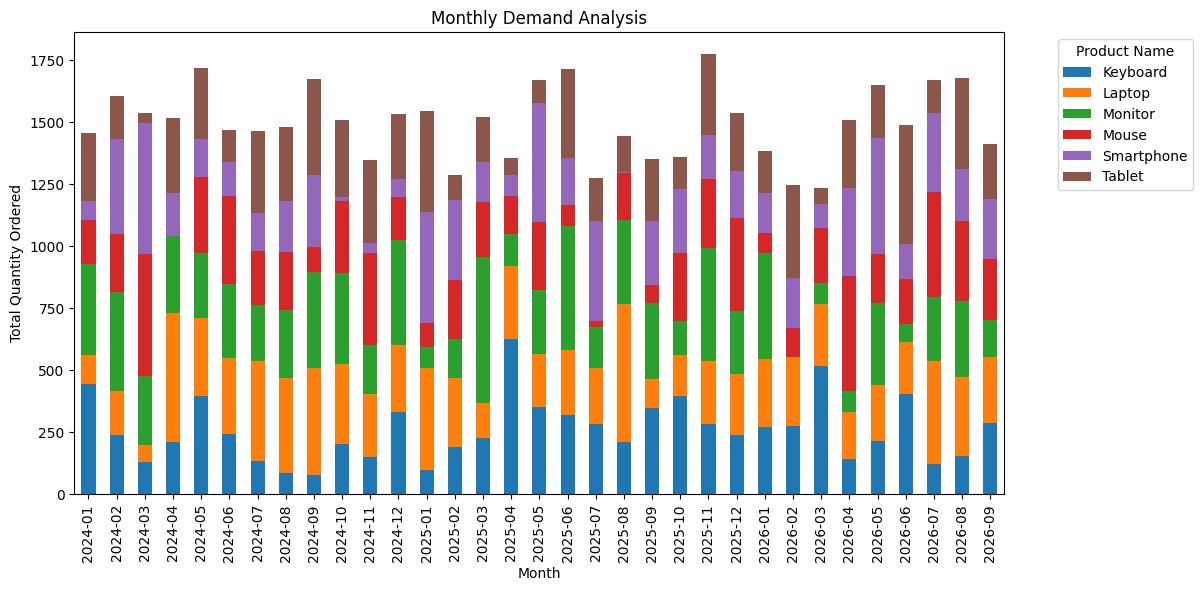

In [15]:
Monthly_demand.plot(kind="bar",figsize=(12,6), stacked=True)
plt.xlabel("Month")
plt.ylabel('Total Quantity Ordered')
plt.title("Monthly Demand Analysis")
plt.legend(title="Product Name",bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            1000 non-null   int64         
 1   Date                1000 non-null   datetime64[ns]
 2   Product Name        1000 non-null   object        
 3   Category            1000 non-null   object        
 4   Supplier            1000 non-null   object        
 5   Warehouse Location  1000 non-null   object        
 6   Quantity Ordered    1000 non-null   int64         
 7   Unit Price          1000 non-null   float64       
 8   Total Cost          1000 non-null   float64       
 9   Lead Time (days)    1000 non-null   int64         
 10  Stock Level         1000 non-null   int64         
 11  Demand Forecast     1000 non-null   int64         
 12  Month               1000 non-null   period[M]     
dtypes: datetime64[ns](1), float64(2), int64(5), objec

In [33]:
Laptop_demand=df[df["Product Name"]=="Laptop"].groupby("Date")["Quantity Ordered"].sum()

In [37]:
model = ExponentialSmoothing(Laptop_demand, trend="add", seasonal="add", seasonal_periods=30)
fit = model.fit()

In [38]:
Future_dates=pd.date_range(start=df["Date"].max(), periods=30)

In [39]:
predicted_demand=fit.forecast(steps=30)

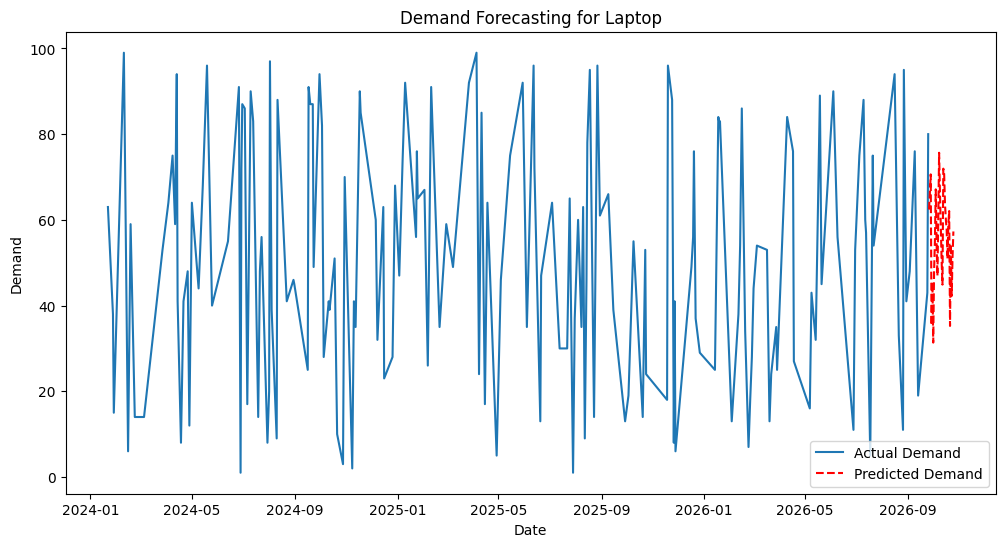

In [40]:
plt.figure(figsize=(12,6))
plt.plot(Laptop_demand.index, Laptop_demand, label="Actual Demand")
plt.plot(Future_dates, predicted_demand, label="Predicted Demand", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.title("Demand Forecasting for Laptop")
plt.legend()
plt.show()

In [41]:
Monitor_demand=df[df["Product Name"]=="Monitor"].groupby("Date")["Quantity Ordered"].sum()

In [43]:
Monitor_model = ExponentialSmoothing(Monitor_demand, trend="add", seasonal="add", seasonal_periods=30)
fit = model.fit()

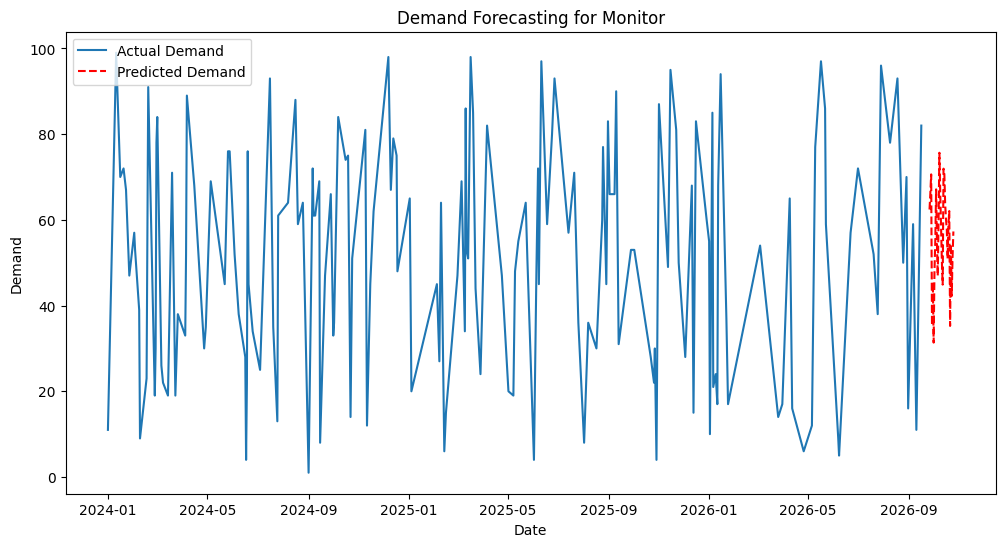

In [45]:
plt.figure(figsize=(12,6))
plt.plot(Monitor_demand.index, Monitor_demand, label="Actual Demand")
plt.plot(Future_dates, predicted_demand, label="Predicted Demand", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.title("Demand Forecasting for Monitor")
plt.legend()
plt.show()

**Supplier Performance Analysis (Lead Time Variability)**

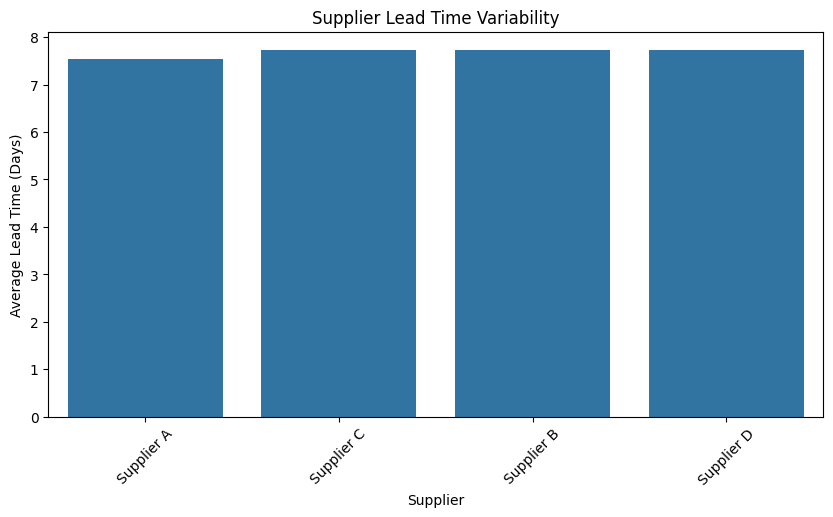

In [57]:
# Lead time variability check karna
supplier_performance = df.groupby("Supplier")["Lead Time (days)"].agg(["mean", "std"]).sort_values(by="mean")

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=supplier_performance.index, y=supplier_performance["mean"])
plt.xlabel("Supplier")
plt.ylabel("Average Lead Time (Days)")
plt.title("Supplier Lead Time Variability")
plt.xticks(rotation=45)
plt.show()

**Inventory Optimization (Economic Order Quantity - EOQ)**

**EOQ=[(2DS)^1/2]/(H)^1/2**

Where D=Annual Demand,
      S=Ordering Cost per Order,
      H=Holding Cost per Unit

In [58]:
#Assume
Ordering_cost=50 #per unit
Holding_cost=3 #per unit

In [60]:
df["EOQ"]=((2*df["Demand Forecast"]*Ordering_cost)**0.5)/(Holding_cost**0.5)

In [63]:
df[["Product Name", "EOQ"]].drop_duplicates().sort_values(by="EOQ", ascending=False).head(10)

,Product Name,EOQ
458,Keyboard,99.833194
295,Monitor,99.833194
695,Laptop,99.666109
370,Keyboard,99.666109
441,Monitor,99.666109
738,Smartphone,99.666109
349,Laptop,99.498744
791,Keyboard,99.498744
497,Smartphone,99.498744
59,Monitor,99.331096


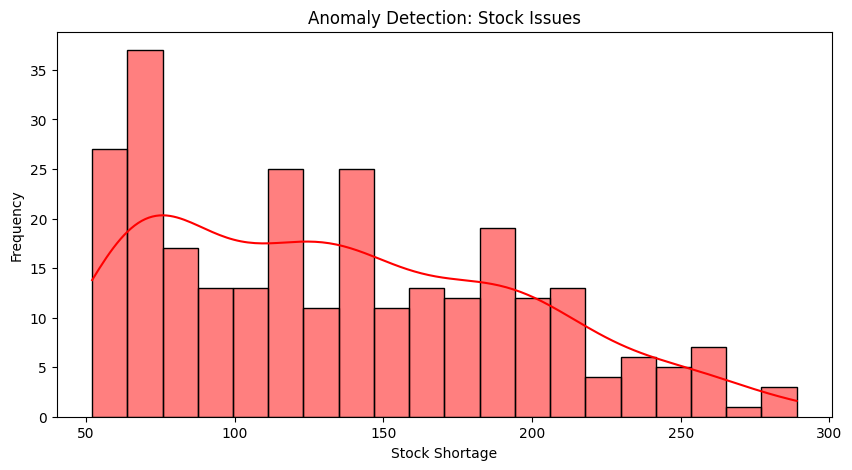

In [64]:
# Difference between stock and demand
df["Stock Issue"] = df["Demand Forecast"] - df["Stock Level"]

# Identify Critical Items
critical_items = df[df["Stock Issue"] > 50]

plt.figure(figsize=(10,5))
sns.histplot(critical_items["Stock Issue"], bins=20, color="red", kde=True)
plt.xlabel("Stock Shortage")
plt.ylabel("Frequency")
plt.title("Anomaly Detection: Stock Issues")
plt.show()


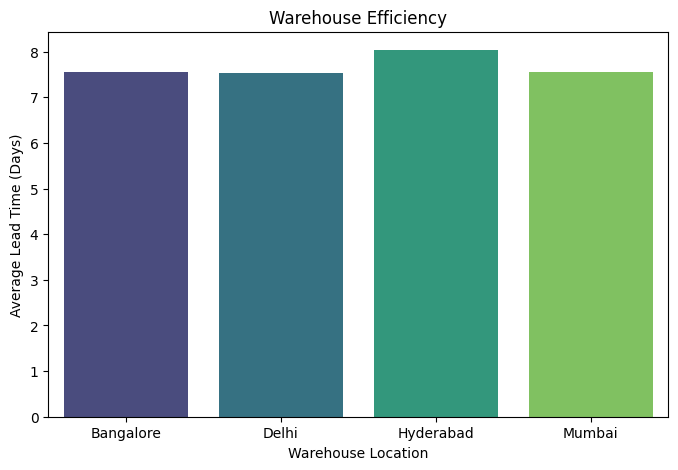

In [65]:
warehouse_analysis = df.groupby("Warehouse Location")["Lead Time (days)"].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=warehouse_analysis.index, y=warehouse_analysis.values, palette="viridis")
plt.xlabel("Warehouse Location")
plt.ylabel("Average Lead Time (Days)")
plt.title("Warehouse Efficiency")
plt.show()
